In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from neurodynex. tools import input_factory

WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


nr of spikes: 59473
The Coefficient of Variation (CV) is in percetange of: 66.9603184598
FANO: 0.000810243072922


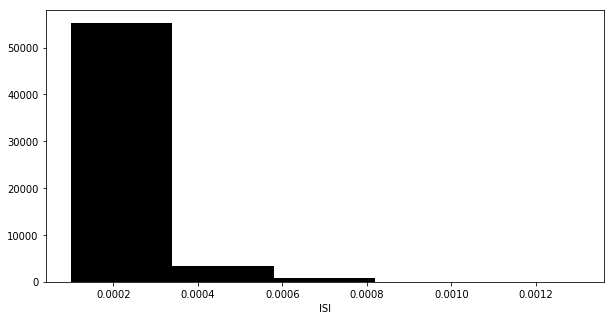

In [3]:
v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 1*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 10000
dt =  0.01*b2.ms 

t_start=0
t_end=simulation_time
sigma = 50*b2.pA
dt_cur = 0.01
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA
size=3000
x = np.linspace(-size, size, size/dt_cur) * b2.pA
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*b2.pA
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_current = b2.TimedArray(tmp, dt=dt)

eqs = """
dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))

vector = list()
spikes = spike_monitor.count[:]
inter = np.full(len(spikes[:]), np.nan)

for k in range(len(spike_monitor.t)-1):
    inter = (float(spike_monitor.spike_trains()[0][k+1]) - float(spike_monitor.spike_trains()[0][k]));
    vector.append(inter)
        
fig = plt.figure(figsize=(10, 5))
plt.hist(vector, 5 , facecolor = 'k')
plt.xlabel('ISI')

isi_mu = np.mean(vector)
isi_std = np.std(vector)
CV = isi_std*100/isi_mu
print("The Coefficient of Variation (CV) is in percetange of: %s" % CV)

aux=[]
for j in range(10):
    state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(100*b2.ms)
    aux.append(spike_monitor.count[:])
    
mean = np.mean(aux)
var = np.var(aux)
print("FANO: {}".format(var/mean))

WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


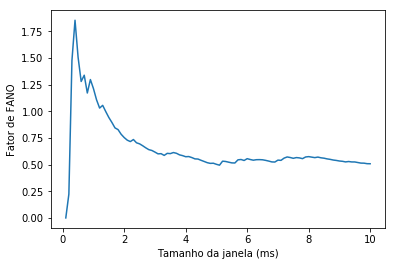

In [4]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from neurodynex. tools import input_factory

v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 1*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 10000
dt =  0.01*b2.ms 

t_start=0
t_end=simulation_time
sigma = 50*b2.pA
dt_cur = 0.01
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA
size=3000
x = np.linspace(-size, size, size/dt_cur) * b2.pA
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*b2.pA
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_current = b2.TimedArray(tmp, dt=dt)

eqs = """
dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation

aux=[]
win = []
fano = []
for k in range(100):
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(100*b2.ms)
    win.append(100000*b2.ms*(k+1)*b2.ms)
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    var = np.var(aux)
    fano.append(var/mean)
plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (ms)')
plt.ylabel('Fator de FANO')
plt.show()

WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


[ 0.1  0.2  0.4  0.5  0.6  0.7  0.8  1.   1.2  1.4  1.5  1.6  1.7  2.   2.1
  2.2  2.3  2.4  2.5  2.7  3.2  3.3  3.4  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.5  4.7  4.8  4.9  5.2  5.3  5.4  5.5  5.6  5.7  5.9  6.   6.1  6.2
  6.3  6.4  6.5  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.8  8.
  8.1  8.2  8.3  8.5  8.7  8.9  9.   9.2  9.3  9.4  9.5  9.6  9.8  9.9] ms
[74]
74.0
0.0
FANO: 0.0
[ 10.   10.1  10.2  10.5  10.7  10.9  11.   11.1  11.2  11.5  11.7  12.
  12.2  12.3  12.5  12.6  12.8  13.1  13.3  13.5  13.9  14.1  14.3  14.6
  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5  15.8  15.9  16.
  16.1  16.2  16.3  16.4  16.6  16.7  16.8  16.9  17.   17.5  17.6  17.9
  18.   18.1  18.2  18.3  18.5  18.6  18.7  18.8  19.   19.1  19.2  19.3
  19.4  19.5  19.6  19.7  19.8  20.4  20.5  20.7  20.8  21.   21.2  21.3
  21.4  21.6  21.8  22.4  22.5  22.6  22.7  22.8  22.9  23.   23.3  23.4
  23.5  23.7  23.9  24.1  24.2  24.3  24.5  24.6  24.7  24.8  24.9  25.
  25.2  25.3  25.

[ 210.2  210.7  210.8  211.   211.1  211.2  211.3  211.4  211.5  211.6
  211.7  211.9  212.1  212.3  212.4  212.5  212.6  212.7  212.9  213.
  213.1  213.2  213.6  213.7  213.8  213.9  214.2  214.4  214.5  214.6
  214.7  215.   215.1  215.2  215.5  215.6  215.7  216.   216.2  216.3
  216.4  216.5  216.6  216.7  217.3  217.6  217.7  217.9  218.   218.1
  218.2  218.3  218.9  219.   219.1  219.2  219.3  219.4  219.7  219.8
  219.9  220.3  220.4  220.5  220.7  220.8  221.1  221.2  221.4  221.5
  221.7  221.8  221.9  222.1  222.3  222.4  222.6  223.   223.1  223.2
  223.3  223.5  223.7  223.8  223.9  224.   224.1  224.3  224.4  224.6
  224.8  225.   225.1  225.2  225.3  225.4  225.5  225.7  225.8  225.9
  226.1  226.4  226.5  226.6  226.7  226.9  227.   227.1  227.3  227.4
  227.5  227.7  228.   228.1  228.2  228.3  228.4  228.6  228.7  228.9
  229.   229.2  229.5  229.6  229.8  230.   230.1  230.3  230.4  230.6
  230.8  230.9  231.   231.1  231.3  231.4  231.6  231.8  231.9  232.
  232.1 

[ 0.45    0.4501  0.4502  0.4503  0.4504  0.4505  0.4506  0.4507  0.451
  0.4511  0.4513  0.4515  0.4516  0.4518  0.4521  0.4522  0.4525  0.4526
  0.453   0.4531  0.4532  0.4533  0.4535  0.4538  0.454   0.4545  0.4548
  0.455   0.4551  0.4552  0.4553  0.4554  0.4555  0.4556  0.4557  0.4558
  0.4559  0.456   0.4562  0.4565  0.4566  0.4568  0.457   0.4571  0.4573
  0.4575  0.4577  0.4579  0.458   0.4582  0.4583  0.4585  0.4589  0.459
  0.4591  0.4594  0.4596  0.46    0.4602  0.4604  0.4606  0.4609  0.4612
  0.4613  0.4614  0.4615  0.4616  0.4618  0.4625  0.4626  0.4628  0.463
  0.4631  0.4632  0.4635  0.464   0.4646  0.4648  0.465   0.4652  0.4654
  0.4655  0.4657  0.4658  0.4659  0.466   0.4662  0.4666  0.4667  0.4668
  0.467   0.4672  0.4675  0.4677  0.4678  0.468   0.4681  0.4684  0.4685
  0.4686  0.4689  0.469   0.4692  0.4693  0.4694  0.4697  0.4698  0.47
  0.4701  0.4707  0.4709  0.471   0.4712  0.4714  0.4717  0.4718  0.4719
  0.472   0.4721  0.4722  0.4723  0.4725  0.4727  0.4729

[ 0.66    0.6603  0.6604  0.6605  0.6606  0.6607  0.6608  0.6609  0.6611
  0.6612  0.6613  0.6614  0.6615  0.6616  0.6618  0.6619  0.662   0.6622
  0.6623  0.6624  0.6625  0.6626  0.6628  0.6629  0.6632  0.6633  0.6634
  0.6638  0.6643  0.6647  0.6648  0.6653  0.6655  0.6657  0.6659  0.666
  0.6663  0.6665  0.6666  0.6667  0.6668  0.6669  0.667   0.6671  0.6672
  0.6675  0.6678  0.6679  0.668   0.6681  0.6683  0.6684  0.6685  0.6688
  0.6689  0.669   0.6698  0.67    0.6702  0.6704  0.6705  0.6713  0.6714
  0.6715  0.6718  0.672   0.6721  0.6722  0.6725  0.6726  0.6727  0.6728
  0.6732  0.6733  0.6736  0.6737  0.674   0.6741  0.6743  0.6744  0.6745
  0.6748  0.6749  0.675   0.6751  0.6752  0.6754  0.6757  0.6758  0.676
  0.6761  0.6762  0.6764  0.6765  0.6766  0.6768  0.6769  0.6773  0.6775
  0.6776  0.6778  0.6779  0.678   0.6781  0.6785  0.6786  0.6788  0.6789
  0.6791  0.6792  0.6794  0.6795  0.6796  0.6808  0.6809  0.681   0.6812
  0.6815  0.6816  0.6817  0.6818  0.6819  0.6822  0.6

[ 0.9101  0.9106  0.9107  0.9109  0.911   0.9111  0.9112  0.9115  0.9117
  0.9119  0.912   0.9121  0.9123  0.9124  0.9125  0.9126  0.9128  0.913
  0.9135  0.9136  0.9137  0.9138  0.9139  0.914   0.9143  0.9147  0.9148
  0.9149  0.9153  0.9154  0.9155  0.9157  0.9158  0.9161  0.9164  0.9165
  0.9166  0.9167  0.9168  0.9169  0.9171  0.9172  0.9174  0.9177  0.9178
  0.9179  0.9181  0.9182  0.9183  0.9184  0.9185  0.9187  0.9188  0.9189
  0.9192  0.9193  0.9194  0.9195  0.9196  0.9198  0.9199  0.92    0.9201
  0.9202  0.9203  0.9204  0.9207  0.9208  0.9209  0.921   0.9211  0.9213
  0.9215  0.9217  0.9221  0.9222  0.9223  0.9224  0.9225  0.9226  0.9227
  0.9228  0.9229  0.923   0.9231  0.9235  0.9236  0.9239  0.924   0.9242
  0.9243  0.9246  0.9249  0.9251  0.9252  0.9255  0.9256  0.9257  0.9258
  0.9261  0.9262  0.9264  0.9266  0.9267  0.9271  0.9274  0.9276  0.9278
  0.9279  0.928   0.9281  0.9282  0.9283  0.9284  0.9285  0.9286  0.9287
  0.9288  0.9291  0.9292  0.9293  0.9295  0.9296  0.

[ 1.2     1.2001  1.2003  1.2004  1.2005  1.2008  1.201   1.2013  1.2014
  1.2015  1.2018  1.2021  1.2023  1.2025  1.2026  1.2028  1.2029  1.203
  1.2031  1.2032  1.2033  1.2034  1.2036  1.2038  1.2039  1.204   1.2041
  1.2042  1.2043  1.2044  1.2046  1.2047  1.2048  1.2049  1.205   1.2051
  1.2052  1.2053  1.2054  1.2056  1.2057  1.2058  1.2059  1.2061  1.2063
  1.2065  1.2066  1.2067  1.2068  1.2069  1.2071  1.2073  1.2074  1.2076
  1.2077  1.2079  1.208   1.2084  1.2086  1.2087  1.2088  1.2092  1.2095
  1.2096  1.2097  1.2099  1.21    1.2101  1.2102  1.2104  1.2105  1.2106
  1.2107  1.2108  1.2112  1.2113  1.2121  1.2122  1.2125  1.2126  1.2129
  1.2131  1.2132  1.2133  1.2135  1.2137  1.2138  1.2139  1.214   1.2141
  1.2143  1.2144  1.2145  1.2148  1.2151  1.2152  1.2153  1.2154  1.2156
  1.2157  1.2159  1.216   1.2166  1.2167  1.2169  1.2171  1.2172  1.2173
  1.2174  1.2176  1.2177  1.2178  1.2179  1.218   1.2181  1.2183  1.2184
  1.2185  1.2187  1.2188  1.2189  1.219   1.2194  1.

[ 2.31    2.3101  2.3103 ...,  2.5297  2.5298  2.5299] s
[1343]
688.590909091
141309.696281
FANO: 205.215744814
[ 2.5301  2.5302  2.5303 ...,  2.7595  2.7598  2.7599] s
[1341]
716.956521739
152867.172023
FANO: 213.216795423
[ 2.76    2.7601  2.7604 ...,  2.9994  2.9997  2.9999] s
[1421]
746.291666667
166290.373264
FANO: 222.822229822
[ 3.0002  3.0003  3.0004 ...,  3.2493  3.2494  3.2499] s
[1485]
775.84
180593.2544
FANO: 232.771260054
[ 3.25    3.2503  3.2505 ...,  3.5096  3.5097  3.5099] s
[1555]
805.807692308
196098.924556
FANO: 243.356977636
[ 3.51    3.5102  3.5103 ...,  3.7794  3.7796  3.7799] s
[1620]
835.962962963
212478.85048
FANO: 254.172564927
[ 3.7801  3.7802  3.7804 ...,  4.0593  4.0595  4.0596] s
[1699]
866.785714286
230541.454082
FANO: 265.972835364
[ 4.0602  4.0603  4.0605 ...,  4.3496  4.3497  4.3499] s
[1695]
895.344827586
245429.191439
FANO: 274.116947881
[ 4.35    4.3501  4.3503 ...,  4.6495  4.6496  4.6497] s
[1800]
925.5
263618.916667
FANO: 284.83945615
[ 4.6501  4

[] s
[0]
1123.1509434
704604.165895
FANO: 627.345923572
[] s
[0]
1102.35185185
714483.857682
FANO: 648.145015116
[] s
[0]
1082.30909091
723185.704463
FANO: 668.187776059
[] s
[0]
1062.98214286
730815.874681
FANO: 687.514724111
[] s
[0]
1044.33333333
737470.116959
FANO: 706.163533635
[] s
[0]
1026.32758621
743234.909929
FANO: 724.169280761
[] s
[0]
1008.93220339
748188.46998
FANO: 741.564663578
[] s
[0]
992.116666667
752401.636389
FANO: 758.380200301
[] s
[0]
975.852459016
755938.650363
FANO: 774.644407952
[] s
[0]
960.112903226
758857.842092
FANO: 790.383963742
[] s
[0]
944.873015873
761212.237843
FANO: 805.623851095
[] s
[0]
930.109375
763050.097412
FANO: 820.387491968
[] s
[0]
915.8
764415.390769
FANO: 834.696866968
[] s
[0]
901.924242424
765348.221534
FANO: 848.572624544
[] s
[0]
888.462686567
765885.203832
FANO: 862.034180401
[] s
[0]
875.397058824
766059.798227
FANO: 875.099808144
[] s
[0]
862.710144928
765902.611636
FANO: 887.78672204
[] s
[0]
850.385714286
765441.66551
FANO: 900

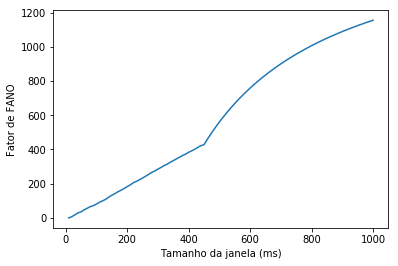

In [7]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from neurodynex. tools import input_factory

v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 1*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 10000
dt =  0.01*b2.ms 

t_start=0
t_end=simulation_time
sigma = 50*b2.pA
dt_cur = 0.01
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA
size=3000
x = np.linspace(-size, size, size/dt_cur) * b2.pA
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*b2.pA
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_current = b2.TimedArray(tmp, dt=dt)

eqs = """
dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)

# run the simulation

auxi=[]
win=[]
fano=[]
for z in range(100):
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(10*(z+1)*b2.ms)
    win.append(10*(z+1))
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    auxi.append(spike_monitor.count[:])
    mean = np.mean(auxi)
    print(mean)
    var = np.var(auxi)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)

plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (ms)')
plt.ylabel('Fator de FANO')
plt.show()